# **Problem Statement**

### Farmers who grow potatoes are often plagued by serious financial losses each year, which lead to several diseases that affect potato plants. The diseases Early Blight and Late Blight are the most common diseases. Early blight is caused by fungus, and late blight is caused by specific micro-organisms. If farmers detect this disease early and apply appropriate treatment, it can save a lot of crop production and prevent economic loss. There are different treatments for early blight and late blight, so it's important to be accurate in identifying the type of disease present in your potato plant. Behind the scenes, we will use Convolutional Neural Network - Deep Learning to diagnose plant diseases.

# Importing Libraries

In [26]:
# Importing Libraries
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense
from tensorflow.keras.models import load_model

# Loading Dataset

In [4]:
# Loading Dataset
IMAGE_SIZE = 256
BATCH_SIZE = 32
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/Potato_leaf_disease/Training',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/Potato_leaf_disease/Testing',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/Potato_leaf_disease/Validation',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3311 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [5]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [6]:
print('training len :', len(training_dataset))
print('testing len :', len(testing_dataset))
print('validation len :', len(validation_dataset))

training len : 104
testing len : 13
validation len : 13


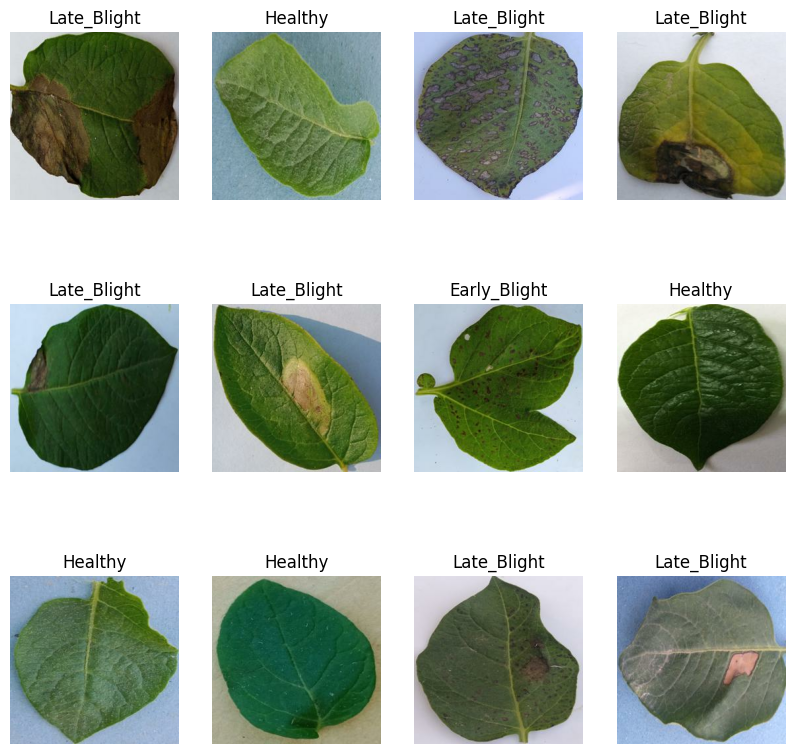

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
# prefetch data : if gpu is busy , cpu will get other batches from disk
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Data Preprocessing

In [9]:
# preprocessing
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# Data Augmentation

In [10]:
# data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Creating CNN Model

In [11]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

# Compiling model

In [13]:
# tell the model what cost and optimization method to use
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Fit the Model

In [14]:
history = model.fit(
    training_dataset,
    epochs=20,
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)
model.evaluate(test_data)

Epoch 1/20
104/104 [==============================] - 714s 7s/step - loss: 0.9838 - accuracy: 0.5008 - val_loss: 0.9839 - val_accuracy: 0.6034
Epoch 2/20
104/104 [==============================] - 13s 116ms/step - loss: 0.6685 - accuracy: 0.7360 - val_loss: 0.4975 - val_accuracy: 0.8101
Epoch 3/20
104/104 [==============================] - 13s 118ms/step - loss: 0.4669 - accuracy: 0.8164 - val_loss: 0.3738 - val_accuracy: 0.8558
Epoch 4/20
104/104 [==============================] - 14s 125ms/step - loss: 0.3463 - accuracy: 0.8747 - val_loss: 0.2316 - val_accuracy: 0.9038
Epoch 5/20
104/104 [==============================] - 15s 137ms/step - loss: 0.2559 - accuracy: 0.9115 - val_loss: 0.4674 - val_accuracy: 0.8438
Epoch 6/20
104/104 [==============================] - 13s 118ms/step - loss: 0.2884 - accuracy: 0.8925 - val_loss: 0.1855 - val_accuracy: 0.9303
Epoch 7/20
104/104 [==============================] - 13s 115ms/step - loss: 0.2178 - accuracy: 0.9218 - val_loss: 0.1670 - val_accu

[0.09765144437551498, 0.970370352268219]

In [178]:
model.save('Potato_Leaf_Disease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluating model Performance

In [182]:
model.evaluate(train_data)

104/104 [==============================] - 3s 24ms/step - loss: 0.0474 - accuracy: 0.9843


[0.0474388562142849, 0.9842947721481323]

In [180]:
model.evaluate(test_data)

13/13 [==============================] - 0s 28ms/step - loss: 0.0977 - accuracy: 0.9704


[0.09765145927667618, 0.970370352268219]

In [181]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 26ms/step - loss: 0.0647 - accuracy: 0.9712


[0.06472505629062653, 0.9711538553237915]

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

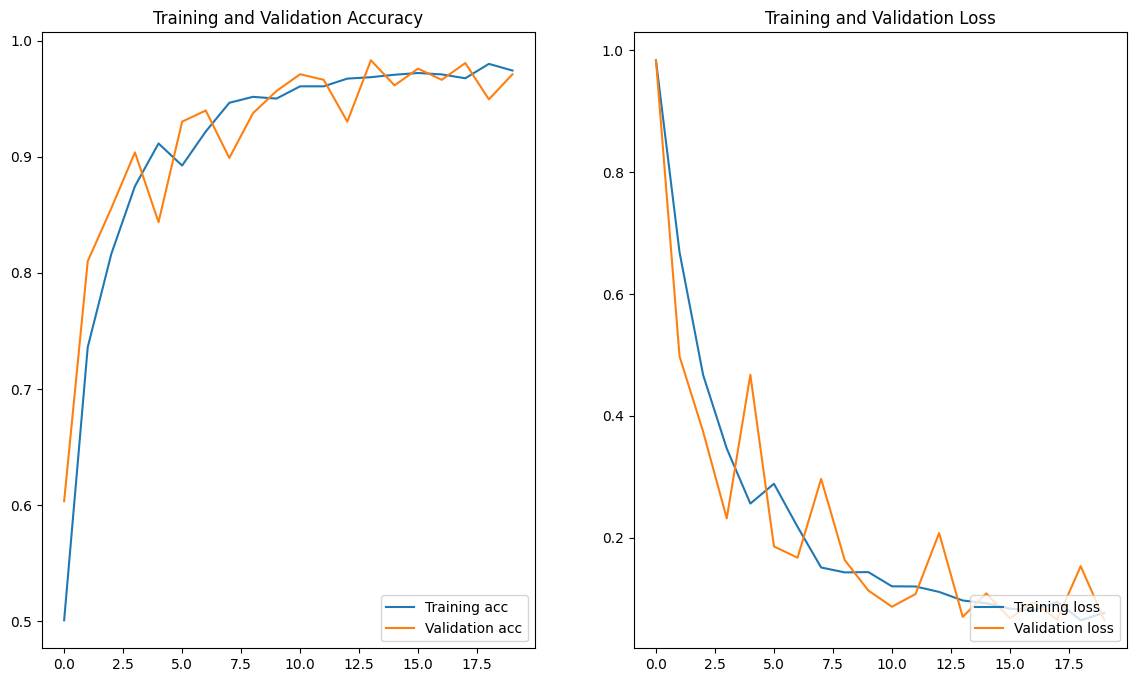

In [22]:
# plot the accuracy
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot( range(20) , acc , label="Training acc" )
plt.plot( range(20) , val_acc , label="Validation acc" )
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

# plot the loss
plt.subplot(1,2,2)
plt.plot( range(20) , loss , label="Training loss" )
plt.plot( range(20) , val_loss , label="Validation loss" )
plt.legend(loc="lower right")
plt.title('Training and Validation Loss')

# Preditions on Unseen data

In [171]:
import cv2

In [172]:
test_img = cv2.imread('/content/drive/MyDrive/Potato_leaf_disease/Validation/Early_Blight/Early_Blight_1.jpg')

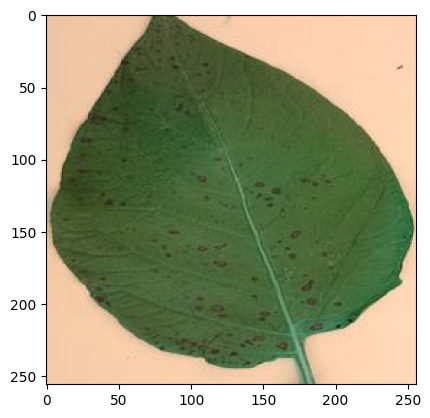

In [173]:
plt.imshow(test_img)

In [174]:
test_img.shape

(256, 256, 3)

In [175]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [176]:
predictions = model.predict(test_input)
predictions

1/1 [==============================] - 0s 32ms/step


array([[9.9926108e-01, 4.4452469e-04, 2.9436624e-04]], dtype=float32)

In [177]:
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]

print("Predicted Class:", predicted_class_label)
print("Confidence:", confidence)

Predicted Class: Early_Blight
Confidence: 0.9992611


In [167]:
test_img1 = cv2.imread('/content/drive/MyDrive/Potato_leaf_disease/Testing/Healthy/Healthy_1.jpg')

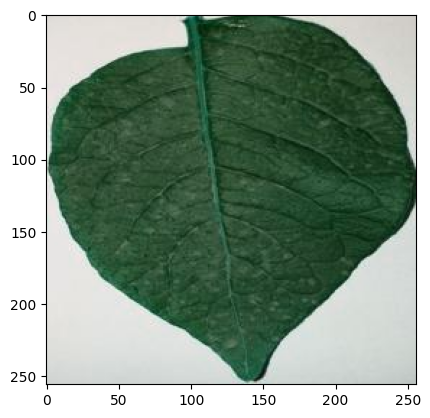

In [168]:
plt.imshow(test_img1)

In [169]:
test_input1 = test_img1.reshape((1,256,256,3))
predictions1 = model.predict(test_input1)
predictions1

1/1 [==============================] - 0s 18ms/step


array([[8.364173e-04, 9.987733e-01, 3.903049e-04]], dtype=float32)

In [170]:
predicted_class_index = np.argmax(predictions1)
predicted_class_label = class_names[predicted_class_index]
confidence = predictions1[0][predicted_class_index]

print("Predicted Class:", predicted_class_label)
print("Confidence:", confidence)

Predicted Class: Healthy
Confidence: 0.9987733


In [163]:
test_img2 = cv2.imread('/content/drive/MyDrive/Potato_leaf_disease/Testing/Late_Blight/Late_Blight_1.jpg')

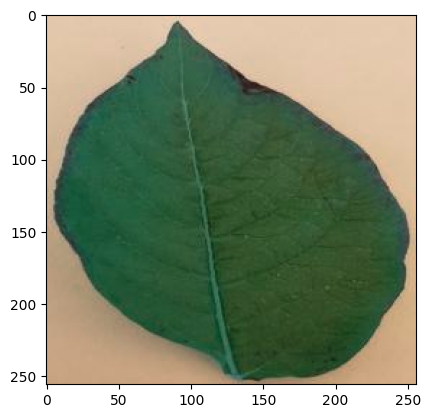

In [164]:
plt.imshow(test_img2)

In [165]:
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))
predictions2 = model.predict(test_input2)
predictions2

1/1 [==============================] - 0s 17ms/step


array([[2.5372730e-05, 5.0842972e-04, 9.9946624e-01]], dtype=float32)

In [166]:
predicted_class_index = np.argmax(predictions2)
predicted_class_label = class_names[predicted_class_index]
confidence = predictions2[0][predicted_class_index]

print("Predicted Class:", predicted_class_label)
print("Confidence:", confidence)

Predicted Class: Late_Blight
Confidence: 0.99946624


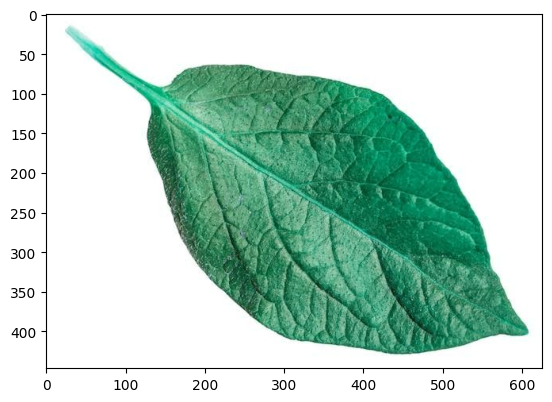

In [157]:
input_image = cv2.imread('/content/drive/MyDrive/leafs/healthy1-leaf.jpeg')
plt.imshow(input_image)

In [158]:
input_image = cv2.resize(input_image,(256,256))
input_image = input_image.reshape((1,256,256,3))
predictions2 = model.predict(input_image)
predictions2

1/1 [==============================] - 0s 19ms/step


array([[0.01059728, 0.97126615, 0.01813663]], dtype=float32)

In [160]:
predicted_class_index = np.argmax(predictions2)
predicted_class_label = class_names[predicted_class_index]
confidence = predictions2[0][predicted_class_index]

print("Predicted Class:", predicted_class_label)
print("Confidence:", confidence)

Predicted Class: Healthy
Confidence: 0.97126615


In [155]:
def predictImage(model,  img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array , 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions)) , 2)
    return predicted_class,confidence

1/1 [==============================] - 0s 18ms/step


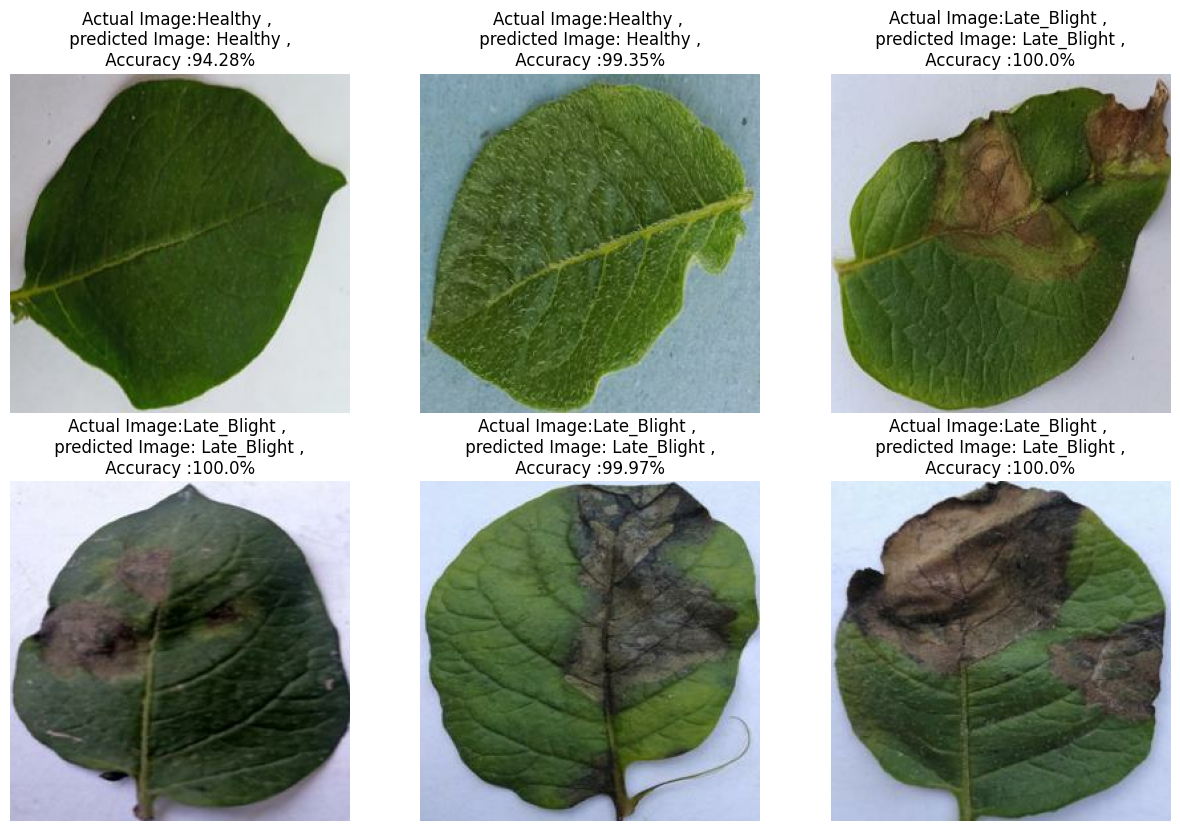

In [149]:
plt.figure(figsize=(15,15))
for image,label in testing_dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        predicted_class,confidence = predictImage(model , image[i])
        actual_class = class_names[label[i]]
        plt.title(f"Actual Image:{actual_class} , \n predicted Image: {predicted_class} , \n Accuracy :{confidence}% " )
        plt.axis('off')

# **Conclusion**

### Development of a deep learning project in the field of agriculture I will created a simple image classification model that will categorize Potato Leaf Disease using a simple convolutional neural network architecture. I'll start by collecting the data from various sources and applied some preprocess and data augmentation techniques for better model performance then I'll build CNN model and evaluate the model preformance its working with 97% accuracy.